### 1. BUSINESS PROBLEM

In today's digital age, e-commerce platforms face the challenge of analyzing vast amounts of customer feedback to understand product sentiment accurately. Understanding customer sentiment is crucial for businesses to make informed decisions about product improvements, marketing strategies, and 
customer satisfaction. However, manually analyzing thousands of product reviews is time-consuming and inefficient. Therefore, The company aims to 
develop a robust automated sentiment analysis system to process and interpret these reviews efficiently for e-commerce product reviews, specifically 
targeting the Electronics category on Amazon.

### 2. PROJECT OBJECTIVE

By leveraging Data Science techniques, the objective of this project is to build an end-to-end solution that can extract, preprocess, analyze, and visualize customer sentiment from textual reviews. This analysis involves the challenge of efficiently processing large volumes of textual data and accurately interpreting the nuanced emotions expressed. A successful sentiment analysis and modeling implementation will significantly contribute to increasing customer trust and loyalty, thereby driving business growth.

### 3. IMPORT LIBRARIES

In [7]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import missingno as msno
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from flask import Flask, request, jsonify
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
import os

#Print the current working directory
print("Current Working Directory:", os.getcwd())

# Change the working directory (optional)
os.chdir(r"C:\Users\igho\Desktop\10\Repositories by Me\My Github\Customer Sentiment Analysis\notebooks")

Current Working Directory: C:\Users\igho


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\igho\\Desktop\\10\\Repositories by Me\\My Github\\Customer Sentiment Analysis\\notebooks'

### 4. LOAD DATASET

In [ ]:
data = pd.read_csv('Sentiment dataset.csv')

# Make a copy of the dataset
data1 = data.copy()

### 5. DATA OVERVIEW

In [ ]:
# Check the first 5 rows
data.head()

In [ ]:
# Check the dimensionality of the data
data.shape

In [ ]:
# View summary of the dataset and check for anomalies
data.info()

In [ ]:
# Inspect data types
data.dtypes

In [ ]:
# Check statistical description of numerical feature
data.describe()

In [ ]:
# Check statistical description of categorical feature
data.describe(include = 'object')

In [ ]:
# Count values of the features in the dataset
data.count()

In [ ]:
# Check the number unique values in each features
data.nunique()

In [ ]:
# Check for duplicates
data.duplicated().sum()

No duplicates in the dataset

In [ ]:
# Check for missing values
data.isnull().sum()

In [ ]:
# Visualize nullity patterns
msno.matrix(data)

In [ ]:
# Visualize missing values
plt.figure(figsize=(7,3))
sns.heatmap(data.isnull(),cbar=True, cmap="viridis");

There are: 3 missing values in the Reviewer column;                                                                                        3 missing values in the Country column;                                                                                        839 missing values in the Reviews column. Below, we are going to drop the rows with missing data.

In [ ]:
# Drop missing values
data.dropna(inplace=True)

In [ ]:
# Recheck for missing values
data.isnull().sum()

In [22]:
# Check the column features
print(f"Feature Names: {data.columns.values}")

NameError: name 'data' is not defined

In [ ]:
# Convert the date_posted from object to pandas datetime function 
data["Date_posted"] = pd.to_datetime(data["Date_posted"])
data.head()

In [ ]:
# Check Customers' reviews texts in the Review column
data['Country'].value_counts()

In [23]:
# StarRatings Value Count
data['StarRatings'].value_counts()

NameError: name 'data' is not defined

In [25]:
# Top 10 Countries with high StarRatings (3-5)

# Filter reviews with high StarRatings (3-5)
high_ratings = data[data['StarRatings'].between(3, 5)]

# Group by 'Country' and count the number of high ratings for each country
high_ratings_count = high_ratings.groupby('Country').size().reset_index(name='HighRatingsCount')

# Sort the results and get the top 10 countries with high ratings
top_10_high_ratings = high_ratings_count.sort_values(by='HighRatingsCount', ascending=False).head(10)

# Display the results
print("Top 10 countries with high StarRatings (3-5 StarRatings):")
print(top_10_high_ratings)

# Plot the top 10 countries with high StarRatings (3-5)
plt.figure(figsize=(6, 4))
plt.bar(top_10_high_ratings['Country'], top_10_high_ratings['HighRatingsCount'], color='green')
plt.xlabel('Country')
plt.ylabel('Number of High Ratings')
plt.title('Top 10 Countries with High StarRatings (3-5)')
plt.xticks(rotation=45)
plt.show()

NameError: name 'data' is not defined

In [27]:
# Top 10 Countries with low StarRatings (1-2)

# Filter reviews with low StarRatings (1-2)
low_ratings = data[data['StarRatings'].between(1, 2)]

# Group by 'Country' and count the number of low ratings for each country
low_ratings_count = low_ratings.groupby('Country').size().reset_index(name='LowRatingsCount')

# Sort the results and get the top 10 countries with low ratings
top_10_low_ratings = low_ratings_count.sort_values(by='LowRatingsCount', ascending=False).head(10)

print("\nTop 10 countries with low StarRatings (1-2 StarRatings):")
print(top_10_low_ratings)

# Plot the top 10 countries with low StarRatings (1-2)
plt.figure(figsize=(6, 4))
plt.bar(top_10_low_ratings['Country'], top_10_low_ratings['LowRatingsCount'], color='green')
plt.xlabel('Country')
plt.ylabel('Number of Low Ratings')
plt.title('Top 10 Countries with Low StarRatings (1-2)')
plt.xticks(rotation=45)
plt.show()

NameError: name 'data' is not defined

In [29]:
# Check Customers' StarRatings
star_ratings_count = data['StarRatings'].value_counts().sort_index()

print(star_ratings_count)

# Plot the StarRatings counts
plt.figure(figsize=(6, 4))
plt.bar(star_ratings_count.index.astype(str), star_ratings_count.values, color='green')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.title('Counts of Star Ratings')
plt.show()

NameError: name 'data' is not defined

In [31]:
# Percentage Distribution of StarRatings
star_ratings = round(data['StarRatings'].value_counts()/data.shape[0]*100,2)
print(star_ratings)

# Plot pie chart for the star ratings distribution
explode = [0.04] * len(star_ratings)
plt.figure(figsize=(6, 6))
plt.pie(star_ratings, labels=star_ratings.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, 
        explode=explode)
plt.title('Star Ratings Distribution')
plt.axis('equal')
plt.show()

NameError: name 'data' is not defined

In [33]:
# Check Customers' reviews texts in the Review column
data[['StarRatings', 'Review']].values[:5]

NameError: name 'data' is not defined

### 6. DATA PREPROCESSING

In [36]:
# Convert the comments in the review column to lowercase.
# To standardizes the data into a uniform format, eliminating inconsistencies that might arise from differences in case sensitivity during the text processing phase.

In [38]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Data cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Apply preprocessing
data['clean_review'] = data['Review'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NameError: name 'data' is not defined

In [40]:
data['clean_review'][:5]

NameError: name 'data' is not defined

### 7. SENTIMENT ANALYSIS (Using VADER Sentiment Analysis and TextBlob Sentiment Analysis Models)

In [43]:
# Download necessary NLTK data
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
from textblob import TextBlob

# Instantiate VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\igho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [47]:
sia.polarity_scores('i dont like it')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [49]:
# Run polarity score on Review with high StarRatings
sia.polarity_scores(data['clean_review'][1])

NameError: name 'data' is not defined

In [95]:
# Run polarity score on Review with low StarRatings
sia.polarity_scores(data['clean_review'][4])

{'neg': 0.073, 'neu': 0.792, 'pos': 0.135, 'compound': 0.2575}

In [96]:
# Create a new 'ID' column by mapping the index of the DataFrame to a zero-padded string (e.g., '01', '02', etc.).
data['ID'] = data.index.map(lambda x: f'{x:02}')

# Reorder the columns in the DataFrame so that the 'ID' column comes first, followed by the other columns.
data = data[['ID'] + [col for col in data.columns if col != 'ID']]
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...",2024-06-04,amazon easy work fulfill order via rd party co...
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,2024-06-04,using aliexpress well year consistently impres...
2,02,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...",2024-06-03,good customercentric marketplace nevertheless ...
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,2024-06-02,purchased android tesla style radio installed ...
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,2024-06-04,absolute con job dont waste money scammer rece...


In [97]:
# Run polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['clean_review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/11155 [00:00<?, ?it/s]

In [98]:
res

{'00': {'neg': 0.03, 'neu': 0.583, 'pos': 0.387, 'compound': 0.9432},
 '01': {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9689},
 '02': {'neg': 0.153, 'neu': 0.587, 'pos': 0.259, 'compound': 0.6705},
 '03': {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5719},
 '04': {'neg': 0.073, 'neu': 0.792, 'pos': 0.135, 'compound': 0.2575},
 '05': {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.836},
 '06': {'neg': 0.119, 'neu': 0.72, 'pos': 0.161, 'compound': 0.3612},
 '07': {'neg': 0.145, 'neu': 0.644, 'pos': 0.211, 'compound': 0.1779},
 '08': {'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'compound': -0.6818},
 '09': {'neg': 0.284, 'neu': 0.584, 'pos': 0.133, 'compound': -0.6903},
 '10': {'neg': 0.104, 'neu': 0.783, 'pos': 0.112, 'compound': 0.1027},
 '11': {'neg': 0.071, 'neu': 0.745, 'pos': 0.184, 'compound': 0.7968},
 '12': {'neg': 0.123, 'neu': 0.811, 'pos': 0.066, 'compound': -0.3182},
 '13': {'neg': 0.333, 'neu': 0.541, 'pos': 0.126, 'compound': -0.9273},
 '14': {'neg'

In [99]:
# VADER Sentiment polarity score
vader_score = pd.DataFrame(res).T
vader_score.head()

,neg,neu,pos,compound
00,0.030,0.583,0.387,0.9432
01,0.000,0.694,0.306,0.9689
02,0.153,0.587,0.259,0.6705
03,0.000,0.909,0.091,0.5719
04,0.073,0.792,0.135,0.2575


In [100]:
# Merge VADER sentiment polarity score with original dataframe
vader_score = vader_score.reset_index().rename(columns={'index': 'ID'})
data = data.merge(vader_score, how='left')
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review,neg,neu,pos,compound
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...",2024-06-04,amazon easy work fulfill order via rd party co...,0.030,0.583,0.387,0.9432
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,2024-06-04,using aliexpress well year consistently impres...,0.000,0.694,0.306,0.9689
2,02,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...",2024-06-03,good customercentric marketplace nevertheless ...,0.153,0.587,0.259,0.6705
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,2024-06-02,purchased android tesla style radio installed ...,0.000,0.909,0.091,0.5719
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,2024-06-04,absolute con job dont waste money scammer rece...,0.073,0.792,0.135,0.2575


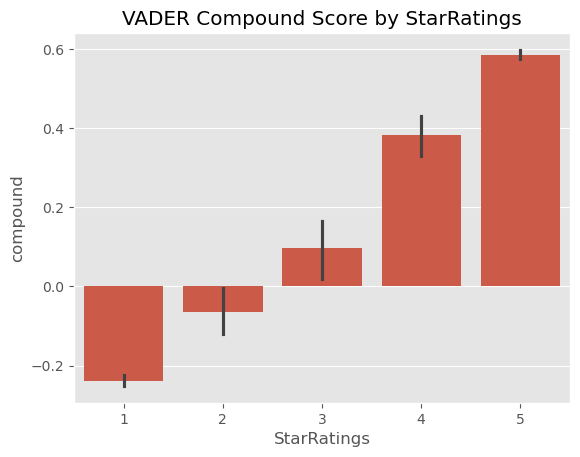

In [101]:
# Plot VADER Compound score and StarRatings
ax = sns.barplot(data=data, x='StarRatings', y='compound')
ax.set_title('VADER Compound Score by StarRatings')
plt.show()

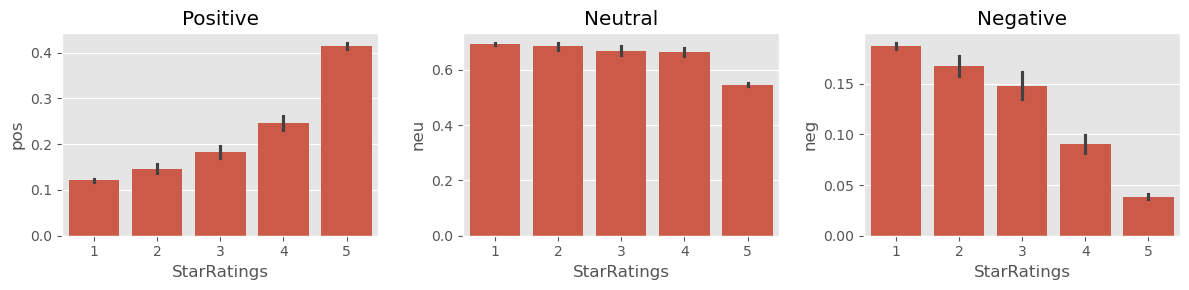

In [102]:
# Plot VADER Positive, Neutral and Negative scores and StarRatings
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=data, x='StarRatings', y='pos', ax=axs[0])
sns.barplot(data=data, x='StarRatings', y='neu', ax=axs[1])
sns.barplot(data=data, x='StarRatings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [103]:
# Apply VADER sentiment analysis
data['vader_sentiment'] = data['clean_review'].apply(
    lambda x: 'positive' if sia.polarity_scores(x)['compound'] >= 0.05 else (
        'negative' if sia.polarity_scores(x)['compound'] <= -0.05 else 'neutral'))

# Filter out each sentiment from VADER sentiment analysis
positive_reviews = data[data['vader_sentiment'] == 'positive']['clean_review']
negative_reviews = data[data['vader_sentiment'] == 'negative']['clean_review']
neutral_reviews = data[data['vader_sentiment'] == 'neutral']['clean_review']

from collections import Counter

# Function to get the most common words
def get_most_common_words(reviews, n=50):
    all_words = ' '.join(reviews).split()
    return [word for word, count in Counter(all_words).most_common(n)]

# Get the top 50 most common words in positive, negative, and neutral reviews
positive_keywords = get_most_common_words(positive_reviews, 50)
negative_keywords = get_most_common_words(negative_reviews, 50)
neutral_keywords = get_most_common_words(neutral_reviews, 50)

print('Positive Keywords:', positive_keywords)
print('Negative Keywords:', negative_keywords)
print('Neutral Keywords:', neutral_keywords)

# Use these keywords to create the sentiment column
def determine_sentiment(text):
    text_tokens = word_tokenize(text)
    if any(word in text_tokens for word in positive_keywords):
        return 'positive'
    elif any(word in text_tokens for word in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the sentiment column
data['vader_review_sentiment'] = data['clean_review'].apply(determine_sentiment)

Positive Keywords: ['aliexpress', 'good', 'seller', 'item', 'product', 'order', 'time', 'refund', 'get', 'service', 'customer', 'delivery', 'money', 'never', 'dont', 'received', 'quality', 'price', 'shipping', 'buy', 'day', 'great', 'ordered', 'one', 'return', 'amazon', 'even', 'like', 'back', 'company', 'would', 'fast', 'store', 'dispute', 'well', 'site', 'delivered', 'month', 'always', 'arrived', 'experience', 'tracking', 'use', 'help', 'sent', 'problem', 'review', 'ive', 'package', 'purchase']
Negative Keywords: ['aliexpress', 'item', 'seller', 'refund', 'order', 'money', 'customer', 'dispute', 'get', 'never', 'service', 'time', 'product', 'dont', 'back', 'received', 'return', 'ordered', 'even', 'company', 'one', 'buy', 'day', 'sent', 'would', 'delivered', 'delivery', 'month', 'package', 'good', 'tracking', 'send', 'scam', 'shipping', 'amazon', 'store', 'wrong', 'site', 'didnt', 'still', 'got', 'said', 'problem', 'pay', 'buyer', 'bought', 'use', 'bad', 'say', 'give']
Neutral Keyword

In [104]:
# Apply TextBlob sentiment analysis
data['textblob_sentiment'] = data['clean_review'].apply(
    lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else (
        'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral'))

# Filter out each sentiment from TextBlob sentiment analysis
positive_reviews = data[data['textblob_sentiment'] == 'positive']['clean_review']
negative_reviews = data[data['textblob_sentiment'] == 'negative']['clean_review']
neutral_reviews = data[data['textblob_sentiment'] == 'neutral']['clean_review']

# Function to get the most common words
def get_most_common_words(reviews, n=50):
    all_words = ' '.join(reviews).split()
    return [word for word, count in Counter(all_words).most_common(n)]

# Get the top 50 most common words in positive, negative, and neutral reviews
positive_keywords = get_most_common_words(positive_reviews, 50)
negative_keywords = get_most_common_words(negative_reviews, 50)
neutral_keywords = get_most_common_words(neutral_reviews, 50)

print('Positive Keywords:', positive_keywords)
print('Negative Keywords:', negative_keywords)
print('Neutral Keywords:', neutral_keywords)

# Use these keywords to create the sentiment column
def determine_sentiment(text):
    text_tokens = word_tokenize(text)
    if any(word in text_tokens for word in positive_keywords):
        return 'positive'
    elif any(word in text_tokens for word in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the sentiment column
data['textblob_review_sentiment'] = data['clean_review'].apply(determine_sentiment)

Positive Keywords: ['aliexpress', 'seller', 'item', 'good', 'product', 'order', 'refund', 'time', 'get', 'customer', 'service', 'money', 'delivery', 'never', 'dispute', 'received', 'dont', 'shipping', 'price', 'day', 'buy', 'one', 'quality', 'ordered', 'return', 'back', 'even', 'great', 'would', 'company', 'amazon', 'store', 'fast', 'like', 'many', 'delivered', 'problem', 'sent', 'site', 'month', 'package', 'tracking', 'also', 'use', 'arrived', 'bought', 'thing', 'review', 'year', 'always']
Negative Keywords: ['aliexpress', 'item', 'seller', 'refund', 'order', 'customer', 'service', 'money', 'get', 'never', 'time', 'product', 'dont', 'dispute', 'back', 'received', 'ordered', 'return', 'company', 'even', 'one', 'buy', 'day', 'sent', 'would', 'amazon', 'delivery', 'delivered', 'month', 'tracking', 'wrong', 'package', 'bad', 'send', 'site', 'like', 'shipping', 'still', 'store', 'said', 'contact', 'got', 'didnt', 'help', 'number', 'arrived', 'use', 'give', 'say', 'fake']
Neutral Keywords: 

In [105]:
# Define the sentiment function for 'StarRatings'
def star_rating_sentiment(StarRatings):
    if StarRatings == 1 or StarRatings == 2:
        return 'Negative'
    elif StarRatings == 4 or StarRatings == 5:
        return 'Positive'
    else:
        return 'Neutral'

data['StarRatings_sentiment'] = data['StarRatings'].apply(star_rating_sentiment)

In [106]:
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review,neg,neu,pos,compound,vader_sentiment,vader_review_sentiment,textblob_sentiment,textblob_review_sentiment,StarRatings_sentiment
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...",2024-06-04,amazon easy work fulfill order via rd party co...,0.030,0.583,0.387,0.9432,positive,positive,positive,positive,Neutral
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,2024-06-04,using aliexpress well year consistently impres...,0.000,0.694,0.306,0.9689,positive,positive,positive,positive,Positive
2,02,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...",2024-06-03,good customercentric marketplace nevertheless ...,0.153,0.587,0.259,0.6705,positive,positive,positive,positive,Positive
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,2024-06-02,purchased android tesla style radio installed ...,0.000,0.909,0.091,0.5719,positive,positive,positive,positive,Negative
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,2024-06-04,absolute con job dont waste money scammer rece...,0.073,0.792,0.135,0.2575,positive,positive,neutral,positive,Negative


In [107]:
# Evaluate TextBlob Model (Compare Textblob Sentiment with TextBlob Review Sentiment)
y_true = data['textblob_review_sentiment']
y_pred = data['textblob_sentiment']

labels = ['positive', 'neutral', 'negative']
textblob_confusion = confusion_matrix(y_true, y_pred, labels=labels)
textblob_accuracy = accuracy_score(y_true, y_pred)
textblob_f1 = f1_score(y_true, y_pred, average='weighted')
textblob_precision = precision_score(y_true, y_pred, average='weighted')
textblob_recall = recall_score(y_true, y_pred, average='weighted')

# Print the results
print('Textblob Confusion Matrix:')
print(textblob_confusion)
print('\nTextblob Accuracy Score:', textblob_accuracy)
print('Textblob F1 Score:', textblob_f1)
print('Textblob Precision Score:', textblob_precision)
print('Textblob Recall Score:', textblob_recall)

Textblob Confusion Matrix:
[[6264  997 3584]
 [ 189   76   20]
 [   9    8    8]]

Textblob Accuracy Score: 0.5690721649484536
Textblob F1 Score: 0.7066052734964274
Textblob Precision Score: 0.9442218129647275
Textblob Recall Score: 0.5690721649484535


In [108]:
# VADER Model Evaluation (Compare VADER Sentiment with VADER Review Sentiment)
y_true = data['vader_review_sentiment']
y_pred = data['vader_sentiment']

labels = ['positive', 'neutral', 'negative']
vader_confusion = confusion_matrix(y_true, y_pred, labels=labels)
vader_accuracy = accuracy_score(y_true, y_pred)
vader_f1 = f1_score(y_true, y_pred, average='weighted')
vader_precision = precision_score(y_true, y_pred, average='weighted')
vader_recall = recall_score(y_true, y_pred, average='weighted')

# Print the results
print('Vader Confusion Matrix:')
print(vader_confusion)
print('\nVader Accuracy Score:', vader_accuracy)
print('Vader F1 Score:', vader_f1)
print('Vader Precision Score:', vader_precision)
print('Vader Recall Score:', vader_recall)

Vader Confusion Matrix:
[[5616  647 4597]
 [ 180   63   16]
 [  10   13   13]]

Vader Accuracy Score: 0.5102644554011654
Vader F1 Score: 0.6591211935441814
Vader Precision Score: 0.9437273560907097
Vader Recall Score: 0.5102644554011654


SENTIMENTS VISUALIZATION

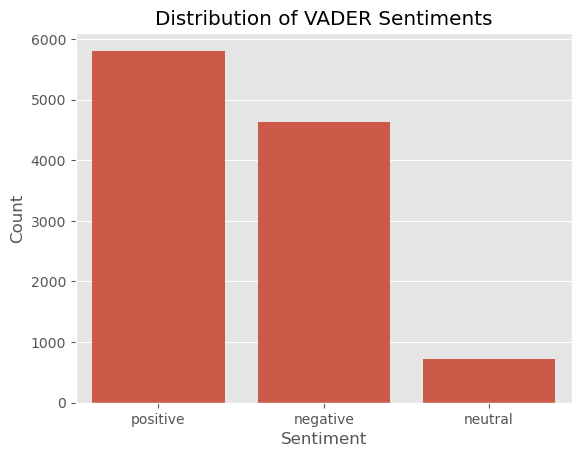

In [110]:
# Plot the distribution of sentiments
sns.countplot(x='vader_sentiment', data=data)
plt.title('Distribution of VADER Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

vader_sentiment
positive    52.05
negative    41.47
neutral      6.48
Name: count, dtype: float64


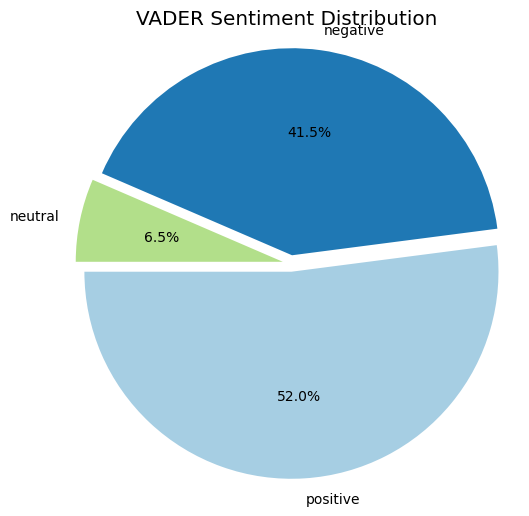

In [111]:
# Percentage Distribution of VADER Sentiment
vader_sentiment = round(data['vader_sentiment'].value_counts()/data.shape[0]*100,2)
print(vader_sentiment)

# Plot pie chart for the star ratings distribution
explode = [0.04] * len(vader_sentiment)
plt.figure(figsize=(6, 6))
plt.pie(vader_sentiment, labels=vader_sentiment.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, 
        explode=explode)
plt.title('VADER Sentiment Distribution')
plt.axis('equal')
plt.show()

In [112]:
# Count the occurrences of each sentiment in the 'vader_sentiment' column
vader_sentiment_counts = data['vader_sentiment'].value_counts()

# Count the occurrences of each sentiment in the 'sentiment' column
sentiment_counts = data['vader_review_sentiment'].value_counts()

# Create DataFrame for sentiment counts
sentiment_counts_data = pd.DataFrame({'VADER Sentiment': vader_sentiment_counts, 'Review Sentiment': sentiment_counts})

# Display the DataFrame
print("Sentiment Counts:")
print(sentiment_counts_data)

Sentiment Counts:
          VADER Sentiment  Review Sentiment
negative             4626                36
neutral               723               259
positive             5806             10860


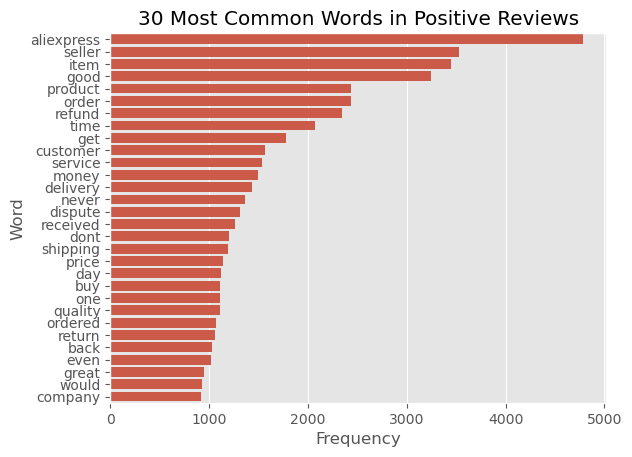

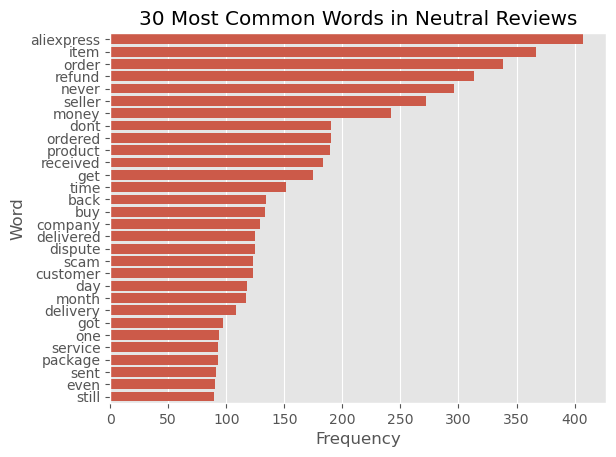

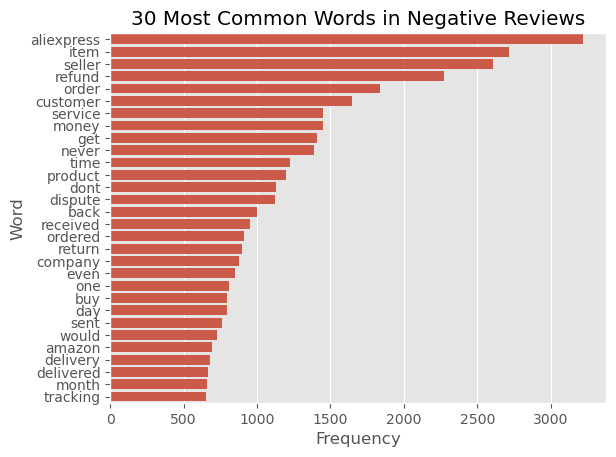

In [113]:
# Count most common words used in sentiments

# Get the most common words in positive reviews
positive_words = ' '.join(positive_reviews).split()
positive_word_freq = Counter(positive_words).most_common(30)

# Get the most common words in neutral reviews
neutral_words = ' '.join(neutral_reviews).split()
neutral_word_freq = Counter(neutral_words).most_common(30)

# Get the most common words in negative reviews
negative_words = ' '.join(negative_reviews).split()
negative_word_freq = Counter(negative_words).most_common(30)

# Plot the most common words in positive reviews
positive_df = pd.DataFrame(positive_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=positive_df)
plt.title('30 Most Common Words in Positive Reviews')
plt.show()

# Plot the most common words in neutral reviews
neutral_df = pd.DataFrame(neutral_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=neutral_df)
plt.title('30 Most Common Words in Neutral Reviews')
plt.show()

# Plot the most common words in negative reviews
negative_df = pd.DataFrame(negative_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=negative_df)
plt.title('30 Most Common Words in Negative Reviews')
plt.show()

vader_review_sentiment
positive    10860
neutral       259
negative       36
Name: count, dtype: int64


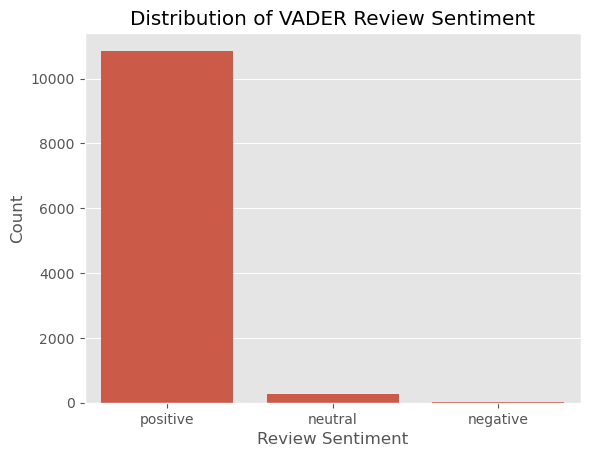

In [114]:
# Review Sentiment Distribution (VADER)
sentiment_count = data['vader_review_sentiment'].value_counts()
print(sentiment_count)

# Plot the distribution of sentiments
sns.countplot(x='vader_review_sentiment', data=data)
plt.title('Distribution of VADER Review Sentiment')
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.show()

textblob_review_sentiment
positive    10845
neutral       285
negative       25
Name: count, dtype: int64


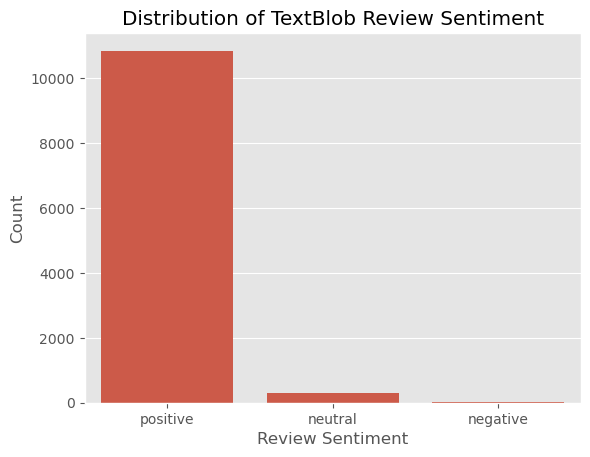

In [115]:
# Review Sentiment Distribution (TextBlob)
sentiment_count = data['textblob_review_sentiment'].value_counts()
print(sentiment_count)

# Plot the distribution of sentiments
sns.countplot(x='textblob_review_sentiment', data=data)
plt.title('Distribution of TextBlob Review Sentiment')
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.show()

StarRatings_sentiment
Negative    6760
Positive    4123
Neutral      272
Name: count, dtype: int64


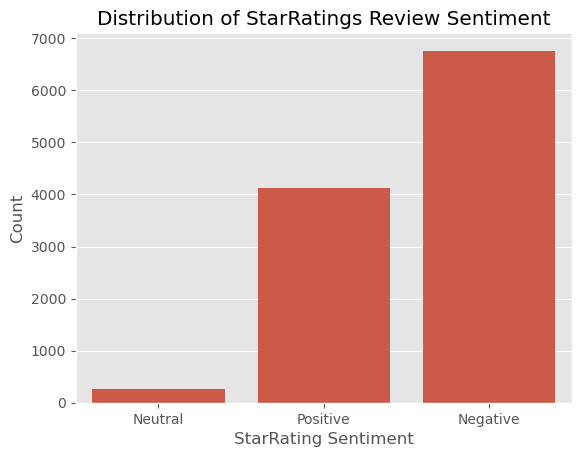

In [116]:
# Review Sentiment Distribution (StarRatings)
sentiment_count = data['StarRatings_sentiment'].value_counts()
print(sentiment_count)

# Plot the distribution of sentiments
sns.countplot(x='StarRatings_sentiment', data=data)
plt.title('Distribution of StarRatings Review Sentiment')
plt.xlabel('StarRating Sentiment')
plt.ylabel('Count')
plt.show()

vader_review_sentiment
positive    97.36
neutral      2.32
negative     0.32
Name: count, dtype: float64


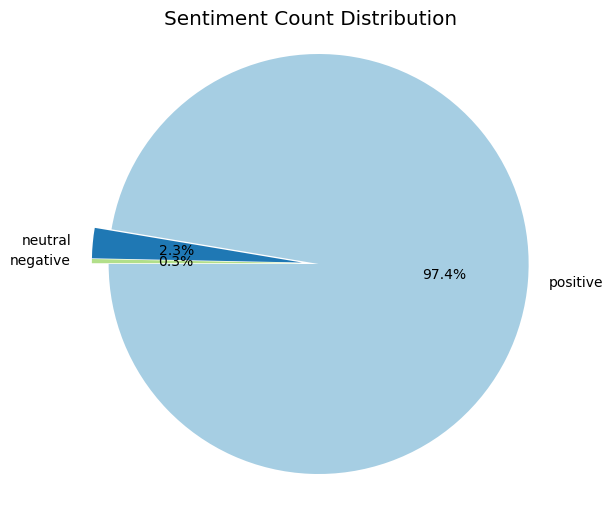

In [117]:
# Percentage Distribution of VADER review sentiment
sentiment_counts = round(data['vader_review_sentiment'].value_counts()/data.shape[0]*100,2)
print(sentiment_counts)

# Plot pie chart for the star ratings distribution
explode = [0.04] * len(sentiment_counts)
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, explode=explode)
plt.title('Sentiment Count Distribution')
plt.axis('equal')
plt.show()

Top 10 countries with Positive sentiment (VADER):
Country
GB    1078
US     892
CA     362
AU     287
NL     188
FR     179
BR     173
ES     160
NZ     156
IL     145
Name: count, dtype: int64


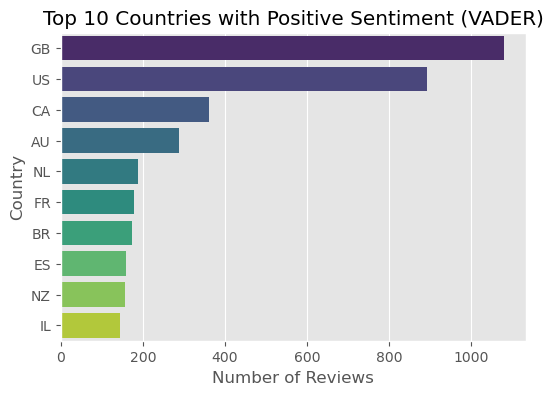

Top 10 countries with Positive sentiment (Review):
Country
GB    2664
US    1853
CA     719
AU     548
NL     331
ES     276
FR     272
NZ     266
IE     242
DE     230
Name: count, dtype: int64


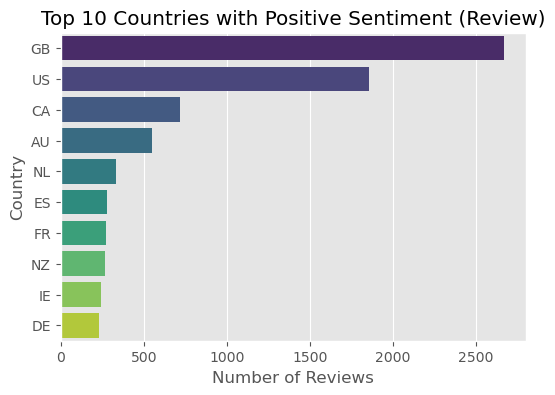

In [118]:
# Function to get top N countries by sentiment
def get_top_countries_by_sentiment(data, sentiment_column, sentiment_value, top_n=10):
    # Filter data by sentiment value
    sentiment_data = data[data[sentiment_column] == sentiment_value]
    
    # Count occurrences of each country
    country_counts = sentiment_data['Country'].value_counts().head(top_n)
    
    return country_counts

# Top 10 countries with Positive sentiment in 'vader_sentiment'

top_positive_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'positive')
print("Top 10 countries with Positive sentiment (VADER):")
print(top_positive_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_positive_countries_vader.values, y=top_positive_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Positive Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Positive sentiment in 'review_sentiment'

top_positive_countries_review = get_top_countries_by_sentiment(data, 'vader_review_sentiment', 'positive')
print("Top 10 countries with Positive sentiment (Review):")
print(top_positive_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_positive_countries_review.values, y=top_positive_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Positive Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


Top 10 countries with Neutral sentiment (VADER):
Country
GB    161
US    138
CA     32
NL     30
ES     30
AU     27
IE     21
IT     19
NZ     18
FR     14
Name: count, dtype: int64


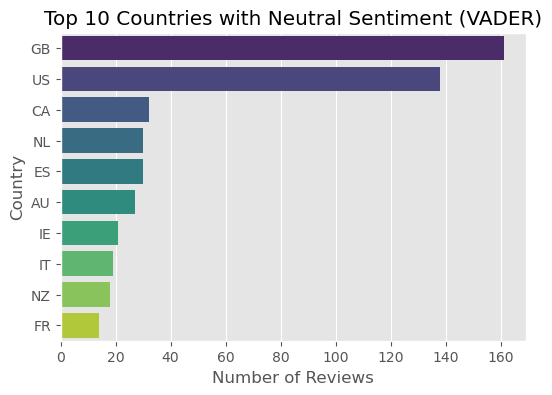


Top 10 countries with Neutral sentiment (Review):
Country
US    22
IT    19
ES    16
GB    16
RU    13
CA    13
FR    10
BR     9
NL     8
PL     6
Name: count, dtype: int64


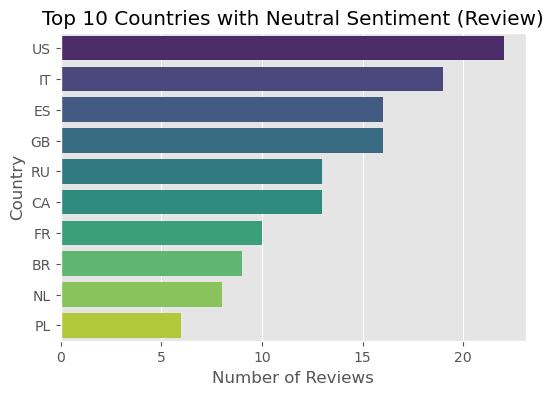

In [119]:
# Top 10 countries with Neutral sentiment in 'vader_sentiment'

top_neutral_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'neutral')
print("\nTop 10 countries with Neutral sentiment (VADER):")
print(top_neutral_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_neutral_countries_vader.values, y=top_neutral_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Neutral Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Neutral sentiment in 'review_sentiment'

top_neutral_countries_review = get_top_countries_by_sentiment(data, 'vader_review_sentiment', 'neutral')
print("\nTop 10 countries with Neutral sentiment (Review):")
print(top_neutral_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_neutral_countries_review.values, y=top_neutral_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Neutral Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


Top 10 countries with Negative sentiment (VADER):
Country
GB    1450
US     850
CA     338
AU     242
NL     124
IE     110
ES     103
DK     100
NZ      97
FR      89
Name: count, dtype: int64


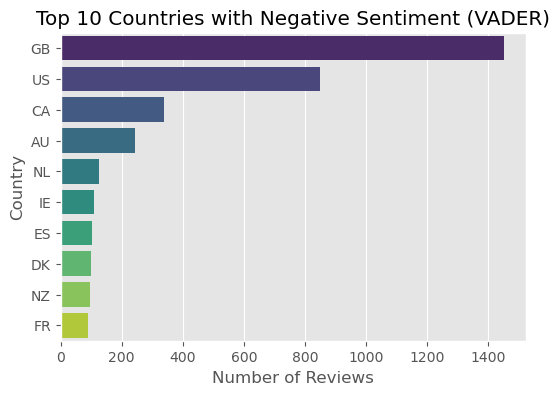


Top 10 countries with Negative sentiment (Review):
Country
GB    9
US    5
NL    3
NO    2
EE    2
SK    2
AU    2
IT    1
NZ    1
RU    1
Name: count, dtype: int64


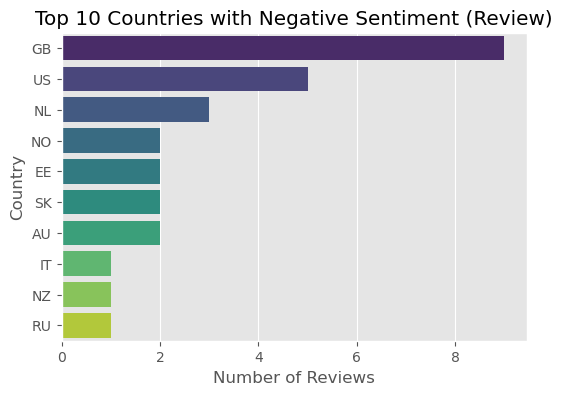

In [120]:
# Top 10 countries with Negative sentiment in 'vader_sentiment'

top_negative_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'negative')
print("\nTop 10 countries with Negative sentiment (VADER):")
print(top_negative_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_negative_countries_vader.values, y=top_negative_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Negative Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Negative sentiment in 'review_sentiment'

top_negative_countries_review = get_top_countries_by_sentiment(data, 'vader_review_sentiment', 'negative')
print("\nTop 10 countries with Negative sentiment (Review):")
print(top_negative_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_negative_countries_review.values, y=top_negative_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Negative Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

In [121]:
# Count words frquency in the dataset
wf = data["clean_review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
wf.columns = ['words', 'wf']
wf_sorted = wf.sort_values(by='wf', ascending=False)
wf_sorted

,words,wf
39,aliexpress,8405.0
260,item,6531.0
94,seller,6412.0
165,refund,4935.0
24,order,4609.0
...,...,...
10975,fraudstersmy,1.0
10976,arrivedalis,1.0
10978,exemplory,1.0
10979,hngaroring,1.0


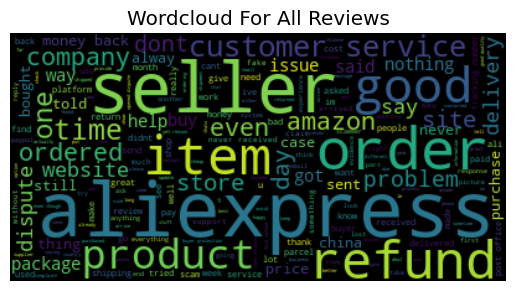

In [122]:
# Create and visualize a Word Cloud- To display the frequently occurring words in the dataset in a visual format
text = " ".join(i for i in data.clean_review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For All Reviews')
plt.axis("off")
plt.show()

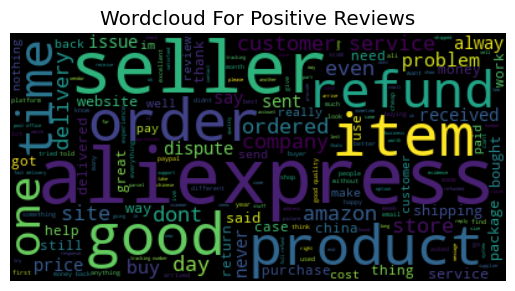

In [123]:
# Display the frequently occurring words in the positive reviews
positive_reviews_text = ' '.join(positive_reviews)

wordcloud = WordCloud().generate(positive_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Positive Reviews')
plt.axis("off")
plt.show()

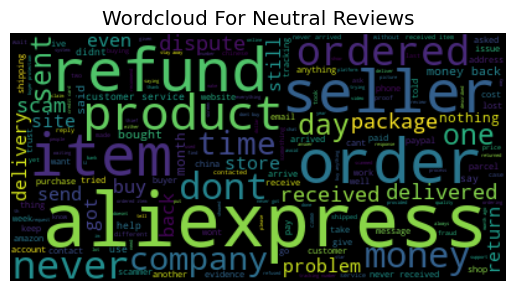

In [124]:
# Display the frequently occurring words in the negative reviews
neutral_reviews_text = ' '.join(neutral_reviews)

wordcloud = WordCloud().generate(neutral_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Neutral Reviews')
plt.axis("off")
plt.show()

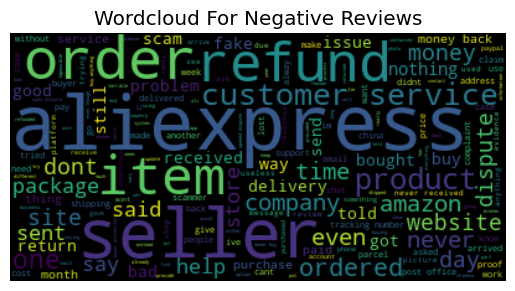

In [125]:
# Display the frequently occurring words in the negative reviews
negative_reviews_text = ' '.join(negative_reviews)

wordcloud = WordCloud().generate(negative_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Negative Reviews')
plt.axis("off")
plt.show()

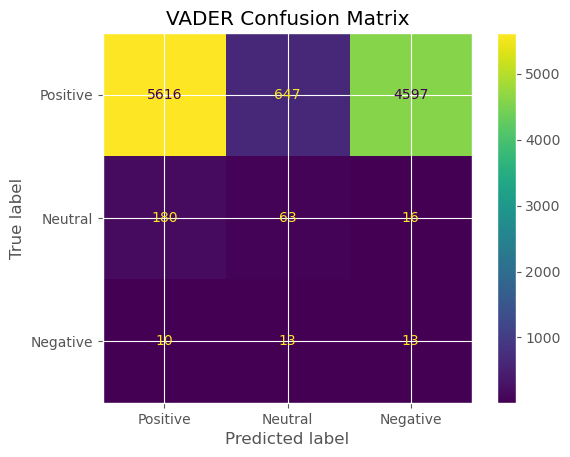

In [126]:
# Plot VADER confusion matrix
ConfusionMatrixDisplay(confusion_matrix=vader_confusion, display_labels=['Positive', 'Neutral', 'Negative']).plot()
plt.title('VADER Confusion Matrix')
plt.show()

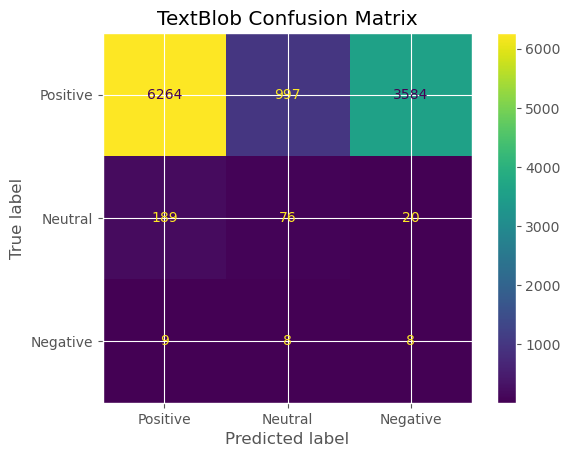

In [127]:
# Plot TextBlob confusion matrix
ConfusionMatrixDisplay(confusion_matrix=textblob_confusion, display_labels=['Positive', 'Neutral', 'Negative']).plot()
plt.title('TextBlob Confusion Matrix')
plt.show()

Correlation matrix:
                         StarRatings  vader_sentiment_numeric
StarRatings                 1.000000                 0.561087
vader_sentiment_numeric     0.561087                 1.000000


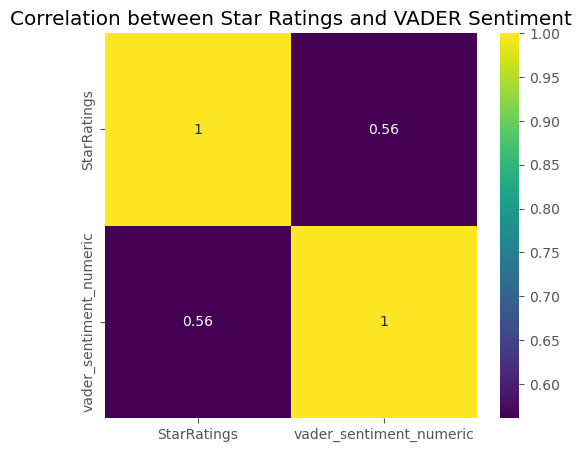

In [128]:
# Check for correlation between StarRatings and VADER Sentiment

# Convert 'vader_sentiment' to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['vader_sentiment_numeric'] = data['vader_sentiment'].map(sentiment_mapping)

# Check for correlation
correlation = data[['StarRatings', 'vader_sentiment_numeric']].corr()

print("Correlation matrix:")
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation between Star Ratings and VADER Sentiment')
plt.show()

Correlation matrix:
                            StarRatings  textblob_sentiment_numeric
StarRatings                    1.000000                    0.498016
textblob_sentiment_numeric     0.498016                    1.000000


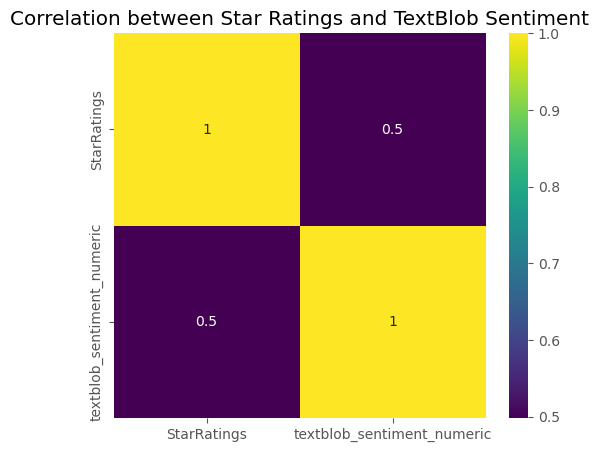

In [129]:
# Check for correlation between StarRatings and TextBlob Sentiment

# Convert 'vader_sentiment' to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['textblob_sentiment_numeric'] = data['textblob_sentiment'].map(sentiment_mapping)

# Check for correlation
correlation = data[['StarRatings', 'textblob_sentiment_numeric']].corr()

print("Correlation matrix:")
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation between Star Ratings and TextBlob Sentiment')
plt.show()

### 8. FEATURE ENGINEERING

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=19738)
x = vectorizer.fit_transform(data['clean_review']).toarray()
y = data['vader_review_sentiment']
